In [1]:
from scipy import interpolate, optimize
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# SSIM Digitized
ssim_Theis = np.transpose(np.loadtxt('./fig/ssim-Theis.csv', delimiter=',', unpack=True))
ssim_JP2 = np.transpose(np.loadtxt('./fig/ssim-jp2.csv', delimiter=',', unpack=True))
ssim_JP = np.transpose(np.loadtxt('./fig/ssim-jp.csv', delimiter=',', unpack=True))
ssim_Tod = np.transpose(np.loadtxt('./fig/ssim-Tod.csv', delimiter=',', unpack=True))

In [3]:
# MS-SSIM Digitized
msssim_Theis = np.transpose(np.loadtxt('./fig/msssim-Theis.csv', delimiter=',', unpack=True))
msssim_JP2 = np.transpose(np.loadtxt('./fig/msssim-jp2.csv', delimiter=',', unpack=True))
msssim_JP = np.transpose(np.loadtxt('./fig/msssim-jp.csv', delimiter=',', unpack=True))
msssim_Tod = np.transpose(np.loadtxt('./fig/msssim-Tod.csv', delimiter=',', unpack=True))

In [4]:
# CAE-P
ssim_CAEP = np.array([
    [0.1528, 0.7231],
    [0.2831, 0.8048],
    [0.3589, 0.8503],
    # [0.5407, 0.8747],  # outliers
    [0.6853, 0.9092],
    [1.012, 0.9381]
])
msssim_CAEP = np.array([
    [0.1322, 0.8985],
    # [0.2831, 0.9320],  # outliers
    [0.3494, 0.9553],
    [0.5407, 0.9691],
    [1.012, 0.9849]
])

In [5]:
# Interpolate & Fit
popt_ssim, pcov_ssim = optimize.curve_fit(lambda t, a, b, c, d: a + b * np.log(c * t**2 + d * t),
                                          ssim_CAEP[:, 0], ssim_CAEP[:, 1])
x_ssim = np.linspace(0.16, 1.0, 50)
y_ssim = popt_ssim[0] + popt_ssim[1]*np.log(popt_ssim[2] * x_ssim**2 + popt_ssim[3] * x_ssim)

in_msssim = interpolate.interp1d(msssim_CAEP[:, 0], msssim_CAEP[:, 1], kind=2)
x_msssim = np.linspace(0.16, 1.0, 50)
y_msssim = in_msssim(x_msssim)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


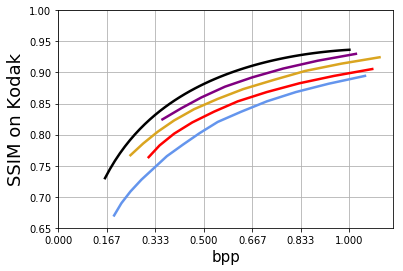

In [6]:
# SSIM
plt.tight_layout()
plt.plot(ssim_Theis[:8, 0], ssim_Theis[:8, 1], label='CAE (Theis et al.)', linewidth=2.5, color='purple')
plt.plot(ssim_JP2[:11, 0], ssim_JP2[:11, 1], label='JPEG 2000', linewidth=2.5, color='goldenrod')
plt.plot(ssim_JP[:10, 0], ssim_JP[:10, 1], label='JPEG', linewidth=2.5, color='r')
plt.plot(ssim_Tod[:14, 0], ssim_Tod[:14, 1], label='RNN (Toderici et al.)', linewidth=2.5, color='cornflowerblue')
plt.plot(x_ssim, y_ssim, label='CAE-P (Ours)', linewidth=2.5, color='black')
plt.xlabel('bpp', fontsize=15)
plt.xticks(np.linspace(0.0, 1.0, 7))
plt.ylabel('SSIM on Kodak', fontsize=18)
plt.yticks(np.linspace(0.65, 1.00, 8))
# plt.legend(loc='lower right')
plt.grid()
plt.savefig('./fig/ssim.pdf')
plt.show()

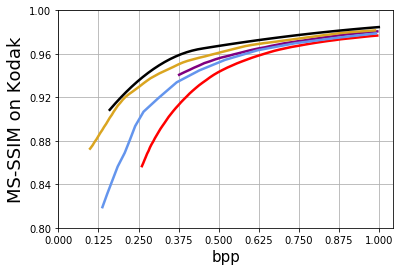

In [7]:
# MS-SSIM
plt.tight_layout()
plt.plot(msssim_Theis[:, 0], msssim_Theis[:, 1], label='CAE (Theis et al.)', linewidth=2.5, color='purple')
plt.plot(msssim_JP2[:, 0], msssim_JP2[:, 1], label='JPEG 2000', linewidth=2.5, color='goldenrod')
plt.plot(msssim_JP[:, 0], msssim_JP[:, 1], label='JPEG', linewidth=2.5, color='r')
plt.plot(msssim_Tod[:16, 0], msssim_Tod[:16, 1], label='RNN (Toderici et al.)', linewidth=2.5, color='cornflowerblue')
plt.plot(x_msssim, y_msssim, label='CAE-P (Ours)', linewidth=2.5, color='black')
plt.xlabel('bpp', fontsize=15)
plt.xticks(np.linspace(0.0, 1.0, 9))
plt.ylabel('MS-SSIM on Kodak', fontsize=18)
plt.yticks(np.linspace(0.80, 1.00, 6))
# plt.legend(loc='lower right')
plt.grid()
plt.savefig('./fig/msssim.pdf')
plt.show()